In [265]:
import pandas as pd
import os
import time
import re
from time import mktime
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

from matplotlib import style

In [275]:
style.use("dark_background")
%matplotlib inline

In [299]:
def Key_stats(gather="Total Debt/Equity (mrq)"):
    path = "/home/markroxor/intraQuarter/"
    
    statspath = path + '/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]

    df = pd.DataFrame(columns=['Date',
                               'Unix',
                               'DE Ratio',
                               'Price',
                               'stock_p_change',
                               'SP500',
                               'sp500_p_change'
                               'Difference'
                              ])
    #print (stock_list)

    #download from quandl.com
    sp500_df = pd.DataFrame.from_csv("./YAHOO-INDEX_GSPC.csv")

    ticker_list = []
    for each_dir in stock_list[1:2]:
        
        each_file = os.listdir(each_dir)
        ticker = each_dir.split("_KeyStats/")[1]
        
        ticker_list.append(ticker)
        
        starting_stock_value = False
        starting_sp500_value = False
        
        if len(each_file):
            for file in each_file:
                print "file began!: ",file
                
                date_stamp = datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                
                #print (date_stamp,unix_time)
                
                full_file_path = each_dir+'/'+file
                #print "full file path..."
                #print(full_file_path)
                
                source = open(full_file_path,'r').read()
                
                try:
                    try:
                        value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    except:
                        value = float(source.split(gather+':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    
                    print "no NA error"
                    
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adj Close"][0])
                        
                    except Exception as e:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adj Close"][0])
                        
                    #print sp500_date
                    
                    try:
                        stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0])
                    except:
                        stock_price = float(source.split('<span id="yfs_l10_de">')[1].split('</span>')[0])
                        
                    #print ("stock_price:",stock_price,"ticker",ticker)
                    
                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value
                    
                        
                    stock_p_change = ((stock_price-starting_stock_value)/starting_stock_value)*100
                    sp500_p_change = ((sp500_value-starting_sp500_value)/starting_sp500_value)*100
                        
                    df = df.append({'Date':date_stamp,
                                    'Unix':unix_time,
                                    'Ticker':ticker,
                                    'DE Ratio':value,
                                    'Price':stock_price,
                                    'stock_p_change':stock_p_change,
                                    'SP500':sp500_value,
                                    'sp500_p_change':sp500_p_change,
                                   'Difference':stock_p_change-sp500_p_change
                                   },
                                  ignore_index=True)
                    
                except Exception as e:
                    print "Exception caught!!!"
                    print(str(e))
        
                #print "ended"        

    for each_ticker in ticker_list:
        try:
            plot_df = df[(df['Ticker']==each_ticker)]
            plot_df = plot_df.set_index(['Date'])
            
            plot_df['Difference'].plot(label=each_ticker)
            plt.legend()
            print "something plotted!"
            
        except Exception as e:
            print (e)
            pass 
    
    plt.show()
    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
    print (save)
    df.to_csv(save)
                

file began!:  20060814132431.html
no NA error
file began!:  20070428095728.html
no NA error
file began!:  20091128100825.html
Exception caught!!!
list index out of range
file began!:  20050119095423.html
no NA error
file began!:  20080318220748.html
no NA error
file began!:  20070528153330.html
no NA error
file began!:  20070629142513.html
no NA error
file began!:  20130425030617.html
no NA error
Exception caught!!!
list index out of range
file began!:  20081221071828.html
no NA error
file began!:  20050310015542.html
no NA error
file began!:  20040627162442.html
no NA error
file began!:  20071225173128.html
no NA error
Exception caught!!!
index out of bounds
file began!:  20040427162051.html
no NA error
file began!:  20110928162430.html
no NA error
file began!:  20070404170611.html
no NA error
file began!:  20080327214501.html
no NA error
file began!:  20111109153018.html
no NA error
file began!:  20070609183829.html
no NA error
something plotted!


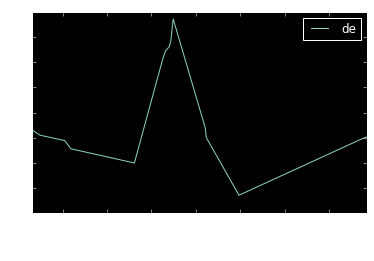

TotalDebtEquitymrq.csv


In [300]:
Key_stats()